In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams["font.family"] = 'Helvetica'
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.size"] = 15
plt.rcParams["axes.linewidth"] = 0.5
import seaborn as sns

In [2]:
df_node = pd.read_csv(
    f"/Users/siomi19/Desktop/comprehensive_PrLD_prediction/nodes_lineage.txt", 
    sep="\t",
    header=0,
    index_col=0
    )

/Users/siomi19/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df_PLAAC_true =pd.read_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_candidates_taxonomy_AGO-name_AGO-group.tsv",
    sep="\t",
    header=0,
    index_col=None
)

In [4]:
df_PLAAC =pd.read_csv(
    "/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plaac_taxonomy_AGO-name_AGO-group.tsv",
    sep="\t",
    header=0,
    index_col=None
)

In [5]:
df_PLAAC_true_plant = df_PLAAC_true[df_PLAAC_true["phylum"]=="Embryophyta"]
count_true_AGO_groups_plant = df_PLAAC_true_plant["AGO group"].value_counts()

df_PLAAC_true_arthropod = df_PLAAC_true[df_PLAAC_true["phylum"]=="Arthropoda"]
count_true_AGO_groups_arthropod = df_PLAAC_true_arthropod['AGO group'].value_counts()

df_PLAAC_true_vertebrate = df_PLAAC_true[df_PLAAC_true["phylum"]=="Vertebrata"]
count_true_AGO_groups_vertebrate = df_PLAAC_true_vertebrate['AGO group'].value_counts()

In [6]:
df_PLAAC_plant = df_PLAAC[df_PLAAC["phylum"]=="Embryophyta"]
count_AGO_groups_plant = df_PLAAC_plant["AGO group"].value_counts()

df_PLAAC_arthropod = df_PLAAC[df_PLAAC["phylum"]=="Arthropoda"]
count_AGO_groups_arthropod = df_PLAAC_arthropod["AGO group"].value_counts()

df_PLAAC_vertebrate = df_PLAAC[df_PLAAC["phylum"]=="Vertebrata"]
count_AGO_groups_vertebrate = df_PLAAC_vertebrate['AGO group'].value_counts()

In [7]:
df_arthropod = pd.concat([count_true_AGO_groups_arthropod, count_AGO_groups_arthropod], axis=1).fillna(0)
df_arthropod.columns = ["Candidate", "All"]
df_arthropod["ratio"] = 100 * df_arthropod["Candidate"] / df_arthropod["All"]
df_arthropod_plot = df_arthropod.loc[["AGO1", "AGO2", "AGO3", "AGO4", "PIWI", "AUB"]]

In [8]:
df_plant = pd.concat([count_true_AGO_groups_plant, count_AGO_groups_plant], axis=1).fillna(0)
df_plant.columns = ["Candidate", "All"]
df_plant["ratio"] = 100 * df_plant["Candidate"] / df_plant["All"]
df_plant_plot = df_plant.loc[["AGO1", "AGO2", "AGO3", "AGO4", "AGO5", "AGO6", "AGO7","AGO8", "AGO9", "AGO10", "AGO11", "AGO12", "AGO13", "AGO14", "AGO15", "AGO16", "AGO17", "AGO18", "MEL"]]

In [9]:
df_vertebrate = pd.concat([count_true_AGO_groups_vertebrate, count_AGO_groups_vertebrate], axis=1).fillna(0)
df_vertebrate.columns = ["Candidate", "All"]
df_vertebrate["ratio"] = 100 * df_vertebrate["Candidate"] / df_vertebrate["All"]
df_vertebrate_plot = df_vertebrate.loc[["AGO1", "AGO2", "AGO3", "AGO4", "PIWI"]]

In [24]:
df_arthropod

,Candidate,All,ratio
AGO2,56.0,325,17.230769
PIWI,42.0,401,10.473815
uncharacterized,14.0,179,7.821229
AGO,13.0,99,13.131313
AUB,11.0,133,8.270677
AGO1,2.0,48,4.166667
AGO3,0.0,70,0.000000
AGO4,0.0,9,0.000000
AGO7,0.0,2,0.000000
AGO8,0.0,1,0.000000


In [10]:
cmap = plt.get_cmap("Set2")

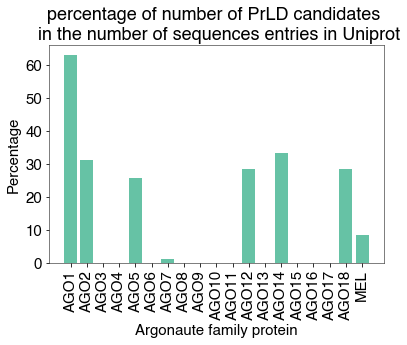

In [18]:
plt.bar(
    np.arange(df_plant_plot.shape[0]), 
    df_plant_plot["ratio"].values,
    tick_label = df_plant_plot.index,
    color = cmap(0)
    )

plt.xticks(rotation=90)
plt.title("percentage of number of PrLD candidates \n in the number of sequences entries in Uniprot")
plt.ylabel("Percentage")
plt.xlabel("Argonaute family protein")
plt.savefig("/Users/siomi19/Desktop/comprehensive_PrLD_prediction/plant_candidates_ratio.svg", bbox_inches="tight")

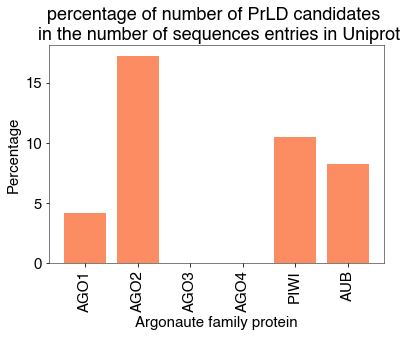

In [19]:
plt.bar(
    np.arange(df_arthropod_plot.shape[0]), 
    df_arthropod_plot["ratio"].values,
    tick_label = df_arthropod_plot.index,
    color = cmap(1)
    )

plt.xticks(rotation=90)
plt.title("percentage of number of PrLD candidates \n in the number of sequences entries in Uniprot")
plt.ylabel("Percentage")
plt.xlabel("Argonaute family protein")
plt.savefig("/Users/siomi19/Desktop/comprehensive_PrLD_prediction/arthropod_candidates_ratio.svg", bbox_inches="tight")

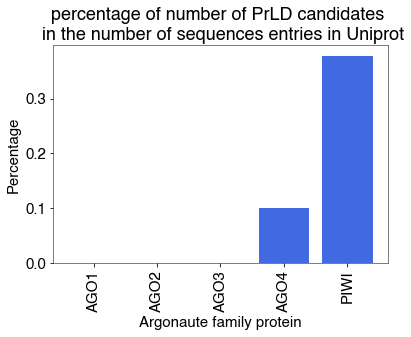

In [20]:
plt.bar(
    np.arange(df_vertebrate_plot.shape[0]), 
    df_vertebrate_plot["ratio"].values,
    tick_label = df_vertebrate_plot.index,
    color = "royalblue"
    )

plt.xticks(rotation=90)
plt.title("percentage of number of PrLD candidates \n in the number of sequences entries in Uniprot")
plt.ylabel("Percentage")
plt.xlabel("Argonaute family protein")
plt.savefig("/Users/siomi19/Desktop/comprehensive_PrLD_prediction/vertebrate_candidates_ratio.svg", bbox_inches="tight")